In [1]:
## Helper functions

import os
import sqlite3
from sqlite3 import Error

def create_connection(db_file, delete_db=False):
    if delete_db and os.path.exists(db_file):
        os.remove(db_file)
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)

    return conn

In [4]:
# Test
# Creating lab2.db 
db_file = 'yelp_reviews.db'
conn = create_connection(db_file)
with conn:
    c = conn.cursor()
    c.execute("SELECT COUNT(*) FROM business;")
    rows = c.fetchall()
print(rows)

[(192609,)]


In [5]:
import pandas as pd
import matplotlib as plt
conn = create_connection(db_file)
business = pd.read_sql("SELECT * FROM business", conn)

In [6]:
business.head()

,address,business_id,categories,city,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


In [7]:
na = business.isna().sum()
na #482 categories are null.
# 482 rows do not vategory values since its only 0.2% of the data, we will be removing all rows containing no data for business categories
business = business.dropna()
len(business) # 192127 rows remaining after dropping all rows having NA values

192127

In [5]:
bus = business.sort_values('review_count', ascending=False)
bus.head()

,address,business_id,categories,city,is_open,latitude,longitude,name,postal_code,review_count,stars,state
82250,3655 Las Vegas Blvd S,4JNXUYY8wbaaDmk3BPzlWw,"Food, French, Breakfast & Brunch, Restaurants,...",Las Vegas,1,36.112859,-115.172434,Mon Ami Gabi,89109,8348,4.0,NV
89206,3570 S Las Vegas Blvd,RESDUcs7fIiihp38-d6_6g,"Restaurants, Buffets, Sandwiches, Food, Breakf...",Las Vegas,1,36.116113,-115.176222,Bacchanal Buffet,89109,8339,4.0,NV
35199,3708 Las Vegas Blvd S,K7lWdNUhCbcnEvI0NhGewg,"Buffets, Breakfast & Brunch, Restaurants",Las Vegas,1,36.109550,-115.176155,Wicked Spoon,89109,6708,3.5,NV
58852,3535 Las Vegas Blvd,f4x1YBxkLrZg652xt2KR5g,"Breakfast & Brunch, Food, Restaurants, America...",Las Vegas,1,36.118181,-115.171580,Hash House A Go Go,89109,5763,4.0,NV
141820,3667 Las Vegas Blvd S,cYwJA2A6I12KNkm2rtXd5g,"Restaurants, Burgers, American (Traditional)",Las Vegas,0,36.110724,-115.172169,Gordon Ramsay BurGR,89109,5484,4.0,NV


In [6]:
#are all business Id's unique?
business.business_id.is_unique #business_id is all unique


True

In [7]:
# How many business are open?
business['is_open'].value_counts()
# 158064 are open; rest 34063 business are closed

1    158064
0     34063
Name: is_open, dtype: int64

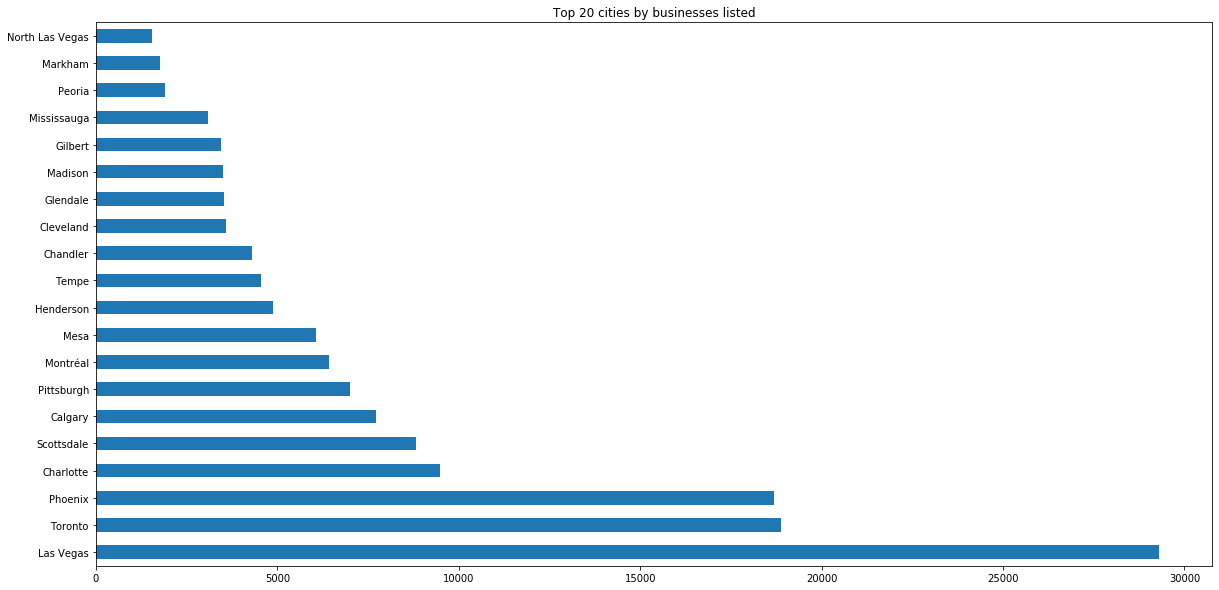

In [48]:
# Top 20 cities with the most business parties mentioned in Yelp.
import matplotlib.pyplot as plt
top50cities = business.city.value_counts().nlargest(20)
top50cities.plot(kind="barh", figsize=(20,10))
plt.title('Top 20 cities by businesses listed')
plt.show()

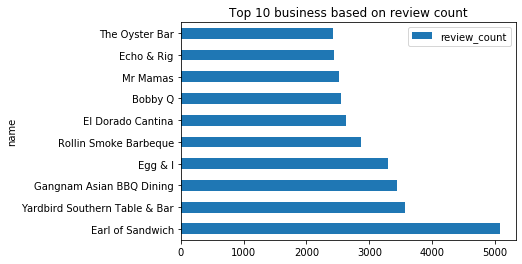

In [53]:
conn = create_connection(db_file)
top10ReviewedBusiness = pd.read_sql("""SELECT business_id,name,review_count FROM business
WHERE stars>4
ORDER BY review_count DESC
LIMIT 10""",conn)
top10ReviewedBusiness.plot(kind='barh',x='name',y='review_count')
plt.title('Top 10 business based on review count')
plt.show()

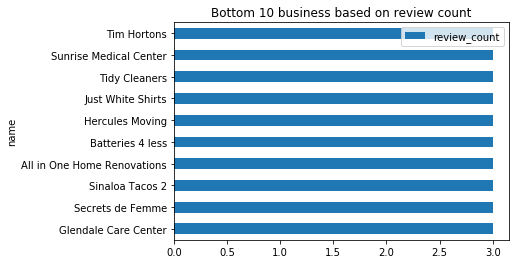

In [54]:
conn = create_connection(db_file)
bottom10ReviewedBusiness = pd.read_sql("""SELECT business_id,name,review_count FROM business
WHERE stars<2
ORDER BY review_count ASC
LIMIT 10""",conn)
top10ReviewedBusiness.plot(kind='barh',x='name',y='review_count')
plt.title('Bottom 10 business based on review count')
plt.show()


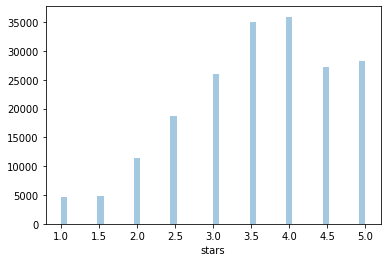

In [17]:
stars = business['stars'].value_counts()
import seaborn as sns
sns.distplot(business.stars, kde=False)

In [12]:
business['Restaurants'] = 'No'
business.loc[business.categories.str.contains("Restaurants"), 'Restaurants'] = 'Yes'
business.head()
business['Restaurants'].value_counts()

No     132756
Yes     59371
Name: Restaurants, dtype: int64

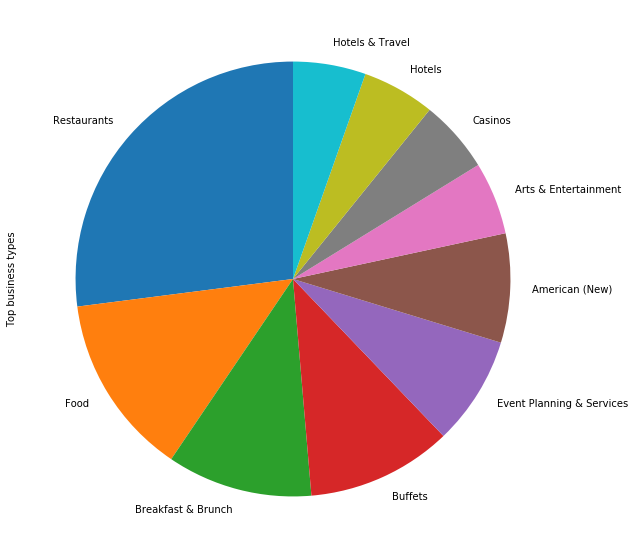

In [46]:
# Categories of top business
num_cat =10 # to show top 10 catrgories
top_business = 30 # choose categories of top 30 businesses
cat_data = top10ReviewedBusiness
#print(cat_data.categories)
Categories={}
for cat in cat_data.categories.values:
    all_categories= cat.split(",")
    for x in all_categories:
        x=x.strip()
        try :
            Categories[x] =Categories[x]+1
        except:
            Categories[x]=1
#print(Categories)
top_categories = pd.DataFrame.from_dict(data= Categories,orient="index")
top_categories.reset_index(inplace=True)
top_categories.columns = ['category', 'occurance']

x_val=top_categories.sort_values("occurance")[::-1][:num_cat].occurance.values
labels=top_categories.sort_values("occurance")[::-1][:num_cat].category.values
series = pd.Series(x_val, index=labels, name='Top business types')
series.plot.pie(figsize=(10, 10),startangle=90)

In [ ]:
# Locations of Top Reviewed business
num_business = 10
business_ids = top10ReviewedBusiness
#.sort_values("rated")[::-1][:num_business].business_id.values
#len(business_ids)
#useful_b = yelp_business.loc[yelp_business['business_id'].isin(business_ids)]
